In [1]:
import warnings
warnings.filterwarnings('ignore')

## Interactive magics - comment out if running from another script
%matplotlib inline
%qtconsole

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style='darkgrid', palette='muted')
pd.set_option('display.notebook_repr_html', True)
plt.rcParams['figure.figsize'] = 10, 6
np.random.seed(0)

In [3]:
# usaremos la implementacion base de svd
from scipy.linalg import svd # https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html
# por otro lado hay otras opciones como svds 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.svds.html 
from scipy.sparse.linalg import svds
# la usaremos para verificdsssssssar el calculo de autovalores/eigenvalues
# https://docs.scipy.org/doc/scipy/reference/generated/scip00000y.sparse.linalg.eigs.html
from scipy.sparse.linalg import eigs

In [11]:
from numpy import genfromtxt
my_data = genfromtxt('dimensiones1.csv', delimiter=',')

In [13]:
cities = pd.DataFrame(my_data)

In [15]:
cities.shape

(11, 11)

In [16]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn import manifold
from sklearn.metrics import euclidean_distances

import scipy.io
import pandas as pd

In [17]:
# indicamos que queremos dos componentes
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(cities).embedding_
pos

array([[    5.16635432,   532.6767745 ],
       [ 1131.7343926 ,  -148.8308927 ],
       [  895.76283045,   562.32685691],
       [  745.76832748,   783.47990447],
       [  323.32707213,   -27.77272106],
       [  111.97012376,  -221.18461259],
       [  156.83592917,  -454.85398464],
       [ -257.94812624,   -23.312514  ],
       [ -516.22463538,  -351.04109352],
       [ -726.08669997,    65.04137865],
       [-1870.30556833,  -716.529096  ]])

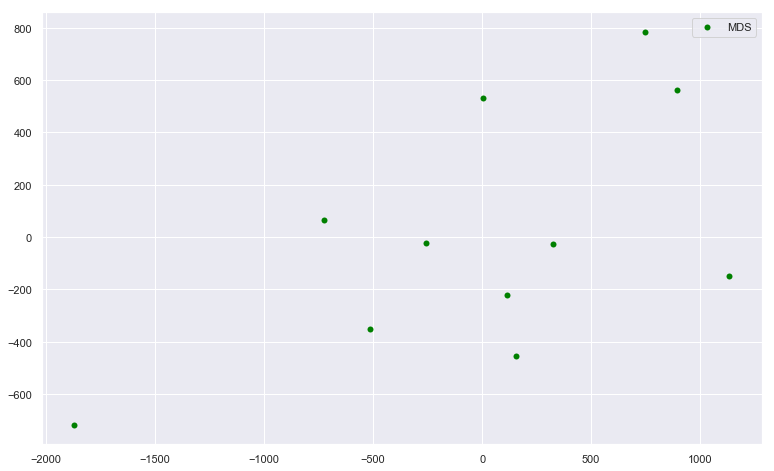

In [18]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

plt.scatter(pos[:, 0], pos[:, 1], color='green', lw=0, label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

plt.show()

In [19]:
my_data6 = genfromtxt('dimensiones5.csv', delimiter=',')

In [28]:
my_data6 = ([[3, 1, 1, 0],
       [2, 1, 0, 2],
       [3, 3, 0, 1],
       [0, 1, 2, 0],
       [2, 0, 2, 2]])
my_data6

[[3, 1, 1, 0], [2, 1, 0, 2], [3, 3, 0, 1], [0, 1, 2, 0], [2, 0, 2, 2]]

In [29]:
## normalizamos/centramos utilizando la media de tal forma que el promedio sea 0
seis = pd.DataFrame(my_data6)
centered = ((seis).iloc[:,:-1]) - seis.mean()

In [34]:
# 150 filas x 4 columnas
print(seis.shape)

(5, 4)


In [35]:
# calculamos la svd
u, s, vt = svd(seis)

In [36]:
u

array([[-0.46968068,  0.00570064, -0.3083355 ,  0.77855809, -0.27954262],
       [-0.42262917,  0.06403416,  0.54753326, -0.27696589, -0.66391373],
       [-0.62711442,  0.54488918, -0.19579499, -0.30929506,  0.41931393],
       [-0.14849486, -0.44030138, -0.68185617, -0.46931336, -0.31448545],
       [-0.43065233, -0.71070219,  0.31917556,  0.03491026,  0.45425676]])

In [37]:
s

array([6.45017782, 2.74947668, 2.13135033, 1.51424231])

In [38]:
vt

array([[-0.77469931, -0.45303371, -0.25239228, -0.36180048],
       [ 0.13036423,  0.45976057, -0.83517948, -0.2722143 ],
       [ 0.10370242, -0.48328205, -0.48499616,  0.72143121],
       [ 0.60999341, -0.5914551 , -0.05959952, -0.52396259]])

In [50]:
#EJERCICIO 2:
my_data2 = ([[1, 6, 2, 3, 2],
             [3, 4, 6, 1, 2],
             [5, 1, 10, 4, 2],
             [6, 0, 11, 2, 2]])

In [51]:
my_data2

[[1, 6, 2, 3, 2], [3, 4, 6, 1, 2], [5, 1, 10, 4, 2], [6, 0, 11, 2, 2]]

In [49]:
dos = pd.DataFrame(my_data2)
dos.cov()

,0,1,2,3,4
0,4.916667,-6.083333,9.083333,0.166667,0.0
1,-6.083333,7.583333,-11.250000,-0.500000,0.0
2,9.083333,-11.250000,16.916667,0.500000,0.0
3,0.166667,-0.500000,0.500000,1.666667,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0


In [42]:
# separando los features y estandarizando
from sklearn.preprocessing import StandardScaler

x = dos.loc[:].values
x = StandardScaler().fit_transform(x)

In [43]:
x

array([[-1.43207802,  1.36277029, -1.47391105,  0.4472136 ,  0.        ],
       [-0.39056673,  0.52414242, -0.3509312 , -1.34164079,  0.        ],
       [ 0.65094455, -0.73379939,  0.77204865,  1.34164079,  0.        ],
       [ 1.1717002 , -1.15311332,  1.05279361, -0.4472136 ,  0.        ]])

In [44]:
from sklearn.decomposition import PCA
# en este caso aplicamos PCA indicando la cantidad de componentes 
# que queremos, 2, para representar en 2 dimensiones.
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [45]:
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [60]:
principalComponents

array([[ 2.4181179 , -0.65518518],
       [ 0.84115545,  1.27905998],
       [-1.35373486, -1.23303048],
       [-1.90553849,  0.60915569]])

In [61]:
# calculamos la svd
u, s, vt = svd(dos)

In [62]:
u

array([[-0.22116432, -0.85013696,  0.26640324, -0.39671501],
       [-0.39157469, -0.34342534, -0.70567948,  0.48035899],
       [-0.61644331,  0.12606306,  0.6092386 ,  0.48263245],
       [-0.64633834,  0.37872719, -0.24469185, -0.61557969]])

In [63]:
s

array([19.42929757,  6.97741707,  2.17516297,  0.2944707 ])

In [64]:
vt

array([[-0.43007911, -0.18064101, -0.82689205, -0.24774532, -0.19306109],
       [ 0.14651059, -0.90985819,  0.23874218, -0.23391601, -0.19742895],
       [-0.12532088, -0.28276496, -0.13814818,  0.93836691, -0.06871163],
       [-0.80128164,  0.08074946,  0.48789833, -0.03537073, -0.33486025],
       [-0.36852275, -0.23032672,  0.04606534, -0.04606534,  0.89827421]])

In [75]:
x = [[1,6,2,3,2], [3,4,6,1,2], [5,1,10,4,2],[6,0,11,2,2]]
x = StandardScaler().fit_transform(x)
cov_matrix = 1/4*np.dot(x.transpose(), x)

In [76]:
cov_matrix

array([[ 0., -0.,  0.,  0.,  0.],
       [-0.,  0., -0., -0.,  0.],
       [ 0., -0.,  0.,  0.,  0.],
       [ 0., -0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [77]:
## EJERCICIO 5
## ============

cinco = [[5,2,1,5],
[4,5,2,3],
[2,5,5,1],
[5,3,1,5],
[3,4,5,2],
[1,4,3,5]]


In [81]:
cinco
cincoDF = pd.DataFrame(cinco)
cincoDF

,0,1,2,3
0,5,2,1,5
1,4,5,2,3
2,2,5,5,1
3,5,3,1,5
4,3,4,5,2
5,1,4,3,5


In [79]:
from scipy.spatial.distance import squareform, pdist

In [84]:
usuDIS = pd.DataFrame(squareform(pdist(cincoDF.iloc[:, 1:])), columns=cincoDF.index.unique(), index=cincoDF.index.unique())

In [85]:
usuDIS

,0,1,2,3,4,5
0,0.000000,3.741657,6.403124,1.000000,5.385165,2.828427
1,3.741657,0.000000,3.605551,3.000000,3.316625,2.449490
2,6.403124,3.605551,0.000000,6.000000,1.414214,4.582576
3,1.000000,3.000000,6.000000,0.000000,5.099020,2.236068
4,5.385165,3.316625,1.414214,5.099020,0.000000,3.605551
5,2.828427,2.449490,4.582576,2.236068,3.605551,0.000000


In [90]:
# indicamos que queremos dos componentes
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(usuDIS).embedding_
pos

array([[-1.71447073, -2.56869156],
       [-1.11937284,  0.77484442],
       [ 1.31516393,  3.27752021],
       [-0.99411454, -2.26765777],
       [ 1.82281464,  1.96935519],
       [ 0.68997954, -1.18537047]])

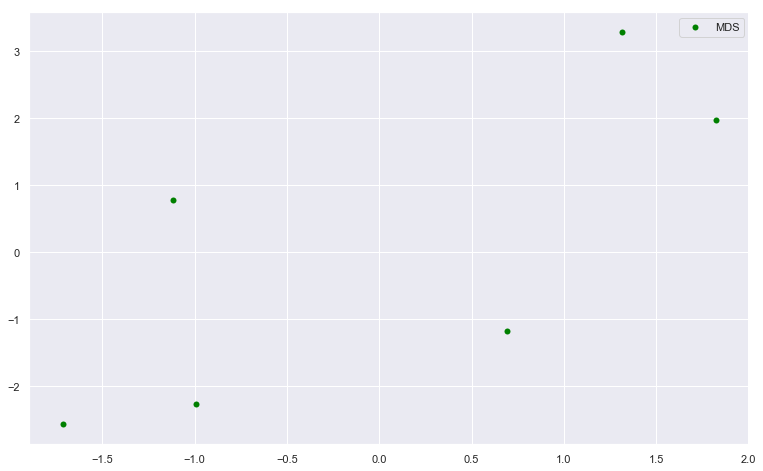

In [91]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

plt.scatter(pos[:, 0], pos[:, 1], color='green', lw=0, label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

plt.show()


In [105]:
#######
x = [[1,6,2,3,2], [3,4,6,1,2], [5,1,10,4,2],[6,0,11,2,2]]

In [115]:

y = zip(*x)
y

[(1, 3, 5, 6), (6, 4, 1, 0), (2, 6, 10, 11), (3, 1, 4, 2), (2, 2, 2, 2)]

In [113]:

cov_matrix = (np.dot(y, x))*(1/4)
cov_matrix


array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])